# Analysis of YouTube Content Creation Evolution

This notebook explores the frequency and consistency of content creation across different YouTube channel categories over time, using the YouNiverse dataset. It serves as an introduction to our project to analyse the evolution of YouTube as a platform, who grew over the years to become one of the biggest platforms on the web.

The evolution of YouTube into a professionalized platform has been marked by the rise of full-time content creators who adopt strategic practices to grow and sustain their audiences. Among these practices, content upload frequency and consistency play a pivotal role in determining a channel's success and its ability to engage audiences over time.

Audience Expectations and Retention:

- Regular uploads build a habit for viewers and establish trust. Consistency in content creation allows creators to maintain audience engagement, leading to greater loyalty and retention. In contrast, sporadic uploads can disrupt audience growth and hinder a channel’s long-term viability.

Algorithmic Promotion:

- YouTube's recommendation algorithms favor channels that upload frequently and consistently, as regular uploads increase the chances of videos being shown to viewers. This is particularly important for driving growth in views, likes, and subscribers.

Indicators of Professionalization:

- Professional content creators often adopt structured upload schedules, mimicking practices seen in traditional media industries. Increased upload frequency and consistency are hallmarks of creators who treat content creation as a full-time career rather than a hobby.

Category-Specific Growth Trends:

- Different content categories (e.g., Gaming, Education, Music) have played unique roles in YouTube's evolution. By analyzing how upload patterns vary across these categories, we can identify which types of content drive the platform's growth and how creators adapt their strategies to meet audience demands.

Tracking Growth Over Time:

- Understanding how upload patterns have changed over the years helps us map YouTube’s transformation into a platform where strategic content creation drives audience engagement and platform growth.


This frequency and consistency analysis provides empirical evidence to support our investigation into YouTube’s professionalization. By analyzing upload behaviors across categories and time, we aim to uncover trends that illustrate YouTube's shift into a platform capable of supporting full-time careers.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from itertools import cycle
from pathlib import Path

In [13]:
ROOT_DIR = Path.cwd().parent.parent

# Load the datasets
channel_data = pd.read_csv(ROOT_DIR / "data" / "df_channels_en_with_monetization.csv", dtype={
        'has_affiliate': 'boolean',
        'has_sponsorships': 'boolean',
        'has_merchandise': 'boolean'
    })

video_data = pd.read_feather(ROOT_DIR / "data" / "yt_metadata_helper.feather")

In [14]:
channel_data.head(5)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,has_affiliate,has_sponsorships,has_merchandise
0,Gaming,2010-04-29,UC-lHJZR3Gqxm24_Vd_AJ5Yw,PewDiePie,101000000,3956,3.0,2.087,9800.0,156700.0,117600.0,1900000.00,<NA>,<NA>,<NA>
1,Education,2006-09-01,UCbCmjCuTUZos6Inko4u57UQ,Cocomelon - Nursery ...,60100000,458,7.0,2.087,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
2,Entertainment,2006-09-20,UCpEhnqL0y41EpW2TvWAHD7Q,SET India,56018869,32661,8.0,2.087,NaN,NaN,NaN,NaN,False,False,True
3,Howto & Style,2016-11-15,UC295-Dw_tDNtZXFeAPAW6Aw,5-Minute Crafts,60600000,3591,9.0,2.087,0.0,0.0,0.0,0.05,False,False,False
4,Sports,2007-05-11,UCJ5v_MCY6GNUBTO8-D3XoAg,WWE,48400000,43421,11.0,2.087,178700.0,2900000.0,2100000.0,34300000.00,False,False,False


In [15]:
video_data.head(5)

,categories,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,SBqSc91Hn9g,1159,8.0,2016-09-28,1057.0
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,UuugEl86ESY,2681,23.0,2016-09-28,12894.0
2,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,779.0,oB4c-yvnbjs,1394,1607.0,2016-09-28,1800602.0
3,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,24.0,ZaV-gTCMV8E,5064,227.0,2016-09-28,57640.0
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,13.0,cGvL7AvMfM0,3554,105.0,2016-09-28,86368.0


In [16]:
channel_data['join_date'] = pd.to_datetime(channel_data['join_date'])
video_data['upload_date'] = pd.to_datetime(video_data['upload_date'])

In [17]:
channel_data.isna().sum()

category_cc                    128
join_date                        1
channel                          0
name_cc                         10
subscribers_cc                   0
videos_cc                        0
subscriber_rank_sb               0
weights                          0
lowest_monthly_earnings     136175
highest_monthly_earnings    136175
lowest_yearly_earnings      136175
highest_yearly_earnings     136175
has_affiliate               101062
has_sponsorships            101062
has_merchandise             101062
dtype: int64

We might want to remove samples that have NaN category and/or NaN name.

In [18]:
channel_data.shape

(136470, 15)

In [19]:
# Remove samples that have no category and/or name
channel_data = channel_data.dropna(subset=['category_cc', 'name_cc'])

In [20]:
# New shape after removing samples
channel_data.shape

(136332, 15)

In [21]:
video_data.isna().sum()

categories             0
channel_id             0
dislike_count    1631458
display_id             0
duration               0
like_count       1631458
upload_date            0
view_count           654
dtype: int64

In [22]:
video_data = video_data.dropna()

In [23]:
video_data.shape

(71293336, 8)

In [24]:
# Add year and month columns of upload date of the video data to facilitate time-based analysis
video_data['year'] = video_data['upload_date'].dt.year
video_data['month'] = video_data['upload_date'].dt.to_period('M')

In [25]:
# Merge with channel metadata if needed
channel_video_data = video_data.merge(
    channel_data,
    left_on='channel_id', # Column name in video data
    right_on='channel',   # Column name in channel data
    how='inner'
)

In [26]:
channel_video_data = channel_video_data.drop(columns='channel')

In [27]:
channel_video_data = channel_video_data.rename(
    columns={
        'categories': 'video_category',
        'category_cc': 'channel_category'
    }
)

In [28]:
channel_video_data.columns

Index(['video_category', 'channel_id', 'dislike_count', 'display_id',
       'duration', 'like_count', 'upload_date', 'view_count', 'year', 'month',
       'channel_category', 'join_date', 'name_cc', 'subscribers_cc',
       'videos_cc', 'subscriber_rank_sb', 'weights', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'has_affiliate', 'has_sponsorships',
       'has_merchandise'],
      dtype='object')

In [29]:
channel_video_data.head(5)

,video_category,channel_id,dislike_count,display_id,duration,like_count,upload_date,view_count,year,month,...,videos_cc,subscriber_rank_sb,weights,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,has_affiliate,has_sponsorships,has_merchandise
0,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,SBqSc91Hn9g,1159,8.0,2016-09-28,1057.0,2016,2016-09,...,2398,54617.0,3.5155,NaN,NaN,NaN,NaN,False,False,False
1,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,1.0,UuugEl86ESY,2681,23.0,2016-09-28,12894.0,2016,2016-09,...,2398,54617.0,3.5155,NaN,NaN,NaN,NaN,False,False,False
2,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,779.0,oB4c-yvnbjs,1394,1607.0,2016-09-28,1800602.0,2016,2016-09,...,2398,54617.0,3.5155,NaN,NaN,NaN,NaN,False,False,False
3,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,24.0,ZaV-gTCMV8E,5064,227.0,2016-09-28,57640.0,2016,2016-09,...,2398,54617.0,3.5155,NaN,NaN,NaN,NaN,False,False,False
4,Film & Animation,UCzWrhkg9eK5I8Bm3HfV-unA,13.0,cGvL7AvMfM0,3554,105.0,2016-09-28,86368.0,2016,2016-09,...,2398,54617.0,3.5155,NaN,NaN,NaN,NaN,False,False,False


In [30]:
channel_video_data.shape

(71251519, 24)

## Frequency Analysis

We define frequency as the number of uploads made by channels within a given category over a specific time period (e.g., per year, per month). It provides a measure of how often content is being uploaded for each category.

We care about frequency because it shows how active channels in each category are over time and it helps identify which categories are growing or declining in activity. In our case, higher frequencies may indicate more professionalized or competitive categories.


In [31]:
# Calculate the number of uploads per category per year
frequency_analysis = channel_video_data.groupby(['channel_category', 'year', 'month']).size().reset_index(name='upload_count')

print(frequency_analysis.head())

   channel_category  year    month  upload_count
0  Autos & Vehicles  2005  2005-12             1
1  Autos & Vehicles  2006  2006-01             4
2  Autos & Vehicles  2006  2006-02           117
3  Autos & Vehicles  2006  2006-03            29
4  Autos & Vehicles  2006  2006-04            20


#### Yearly Growth per Category

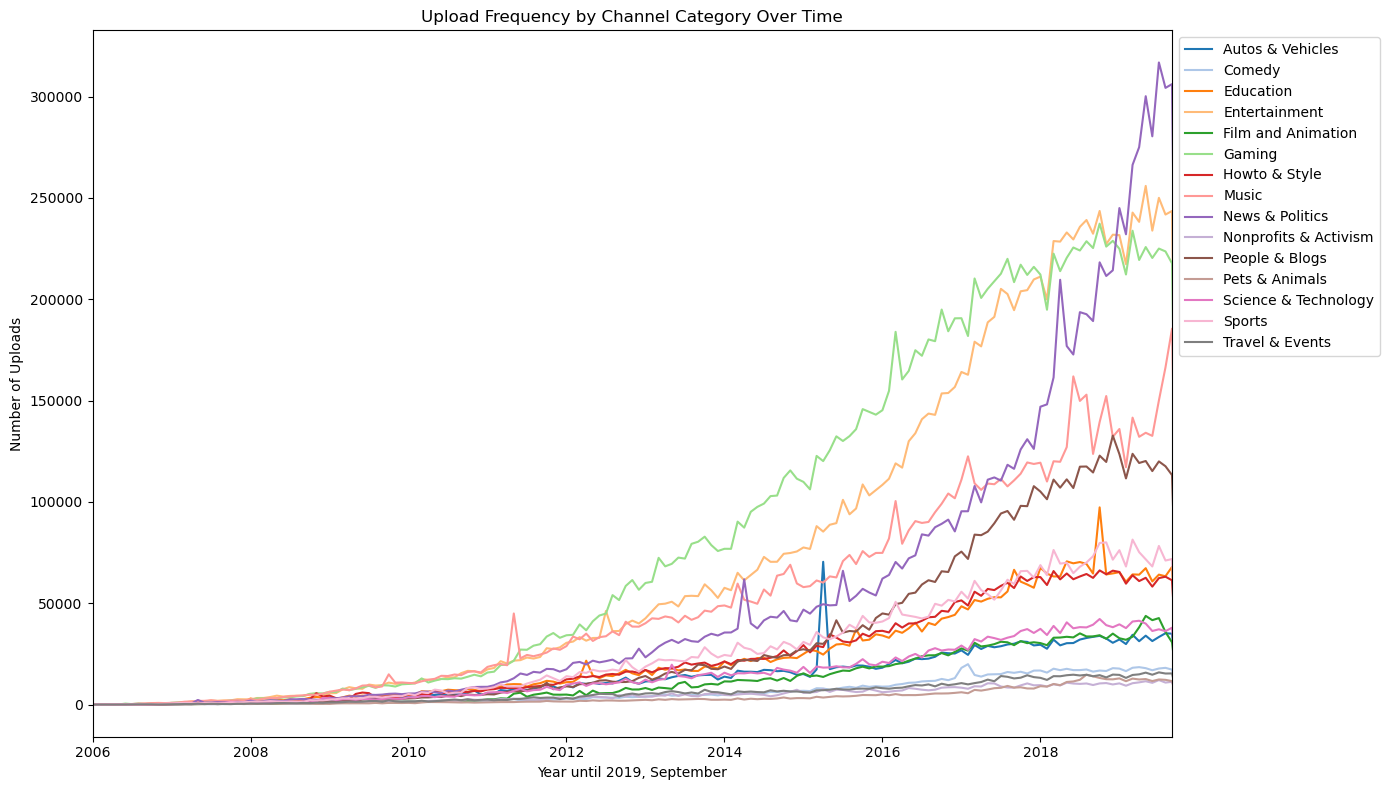

In [32]:
temp_df = frequency_analysis.copy()

temp_df['month'] = frequency_analysis['month'].dt.month
temp_df['time'] = frequency_analysis['year'] + (temp_df['month'] - 1) / 12

# We stop at year 2019, month September because there are almost no data to plot after this date
cutoff_year = 2019 + (9 - 1) / 12

# Define a color cycle with 15 distinct colors
colors = plt.cm.tab20.colors  # Tab20 provides 20 distinct colors
color_cycle = cycle(colors)  # Cycle through the colors

# Plot upload frequencies over time
plt.figure(figsize=(14, 8))
categories = temp_df['channel_category'].unique()

for category in categories:
    subset = temp_df[temp_df['channel_category'] == category]
    plt.plot(subset['time'], subset['upload_count'], label=category, color=next(color_cycle))

# Customize the plot
plt.title("Upload Frequency by Channel Category Over Time")
plt.xlabel("Year until 2019, September")
plt.ylabel("Number of Uploads")
plt.xlim(2006, cutoff_year)  # Limit the x-axis to the range [2006, 2019.91]
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend outside the plot
plt.tight_layout()
plt.show()


This graph showcases the evolution of upload frequency across various YouTube channel categories from 2006 to 2019.

Categories like Gaming, Entertainment, and Music demonstrate the highest and most rapid growth in upload frequency, particularly after 2012. This reflects the rising professionalization within these categories, where creators likely adopted regular upload schedules to engage larger audiences.

The graph illustrates YouTube's shift from casual video sharing to structured, high-frequency content creation. Categories driving this transformation reflect strategic professionalization, where consistent and frequent uploads align with audience demand and algorithmic visibility. This analysis underscores the role of content categories in shaping YouTube into a platform supporting full-time digital careers.

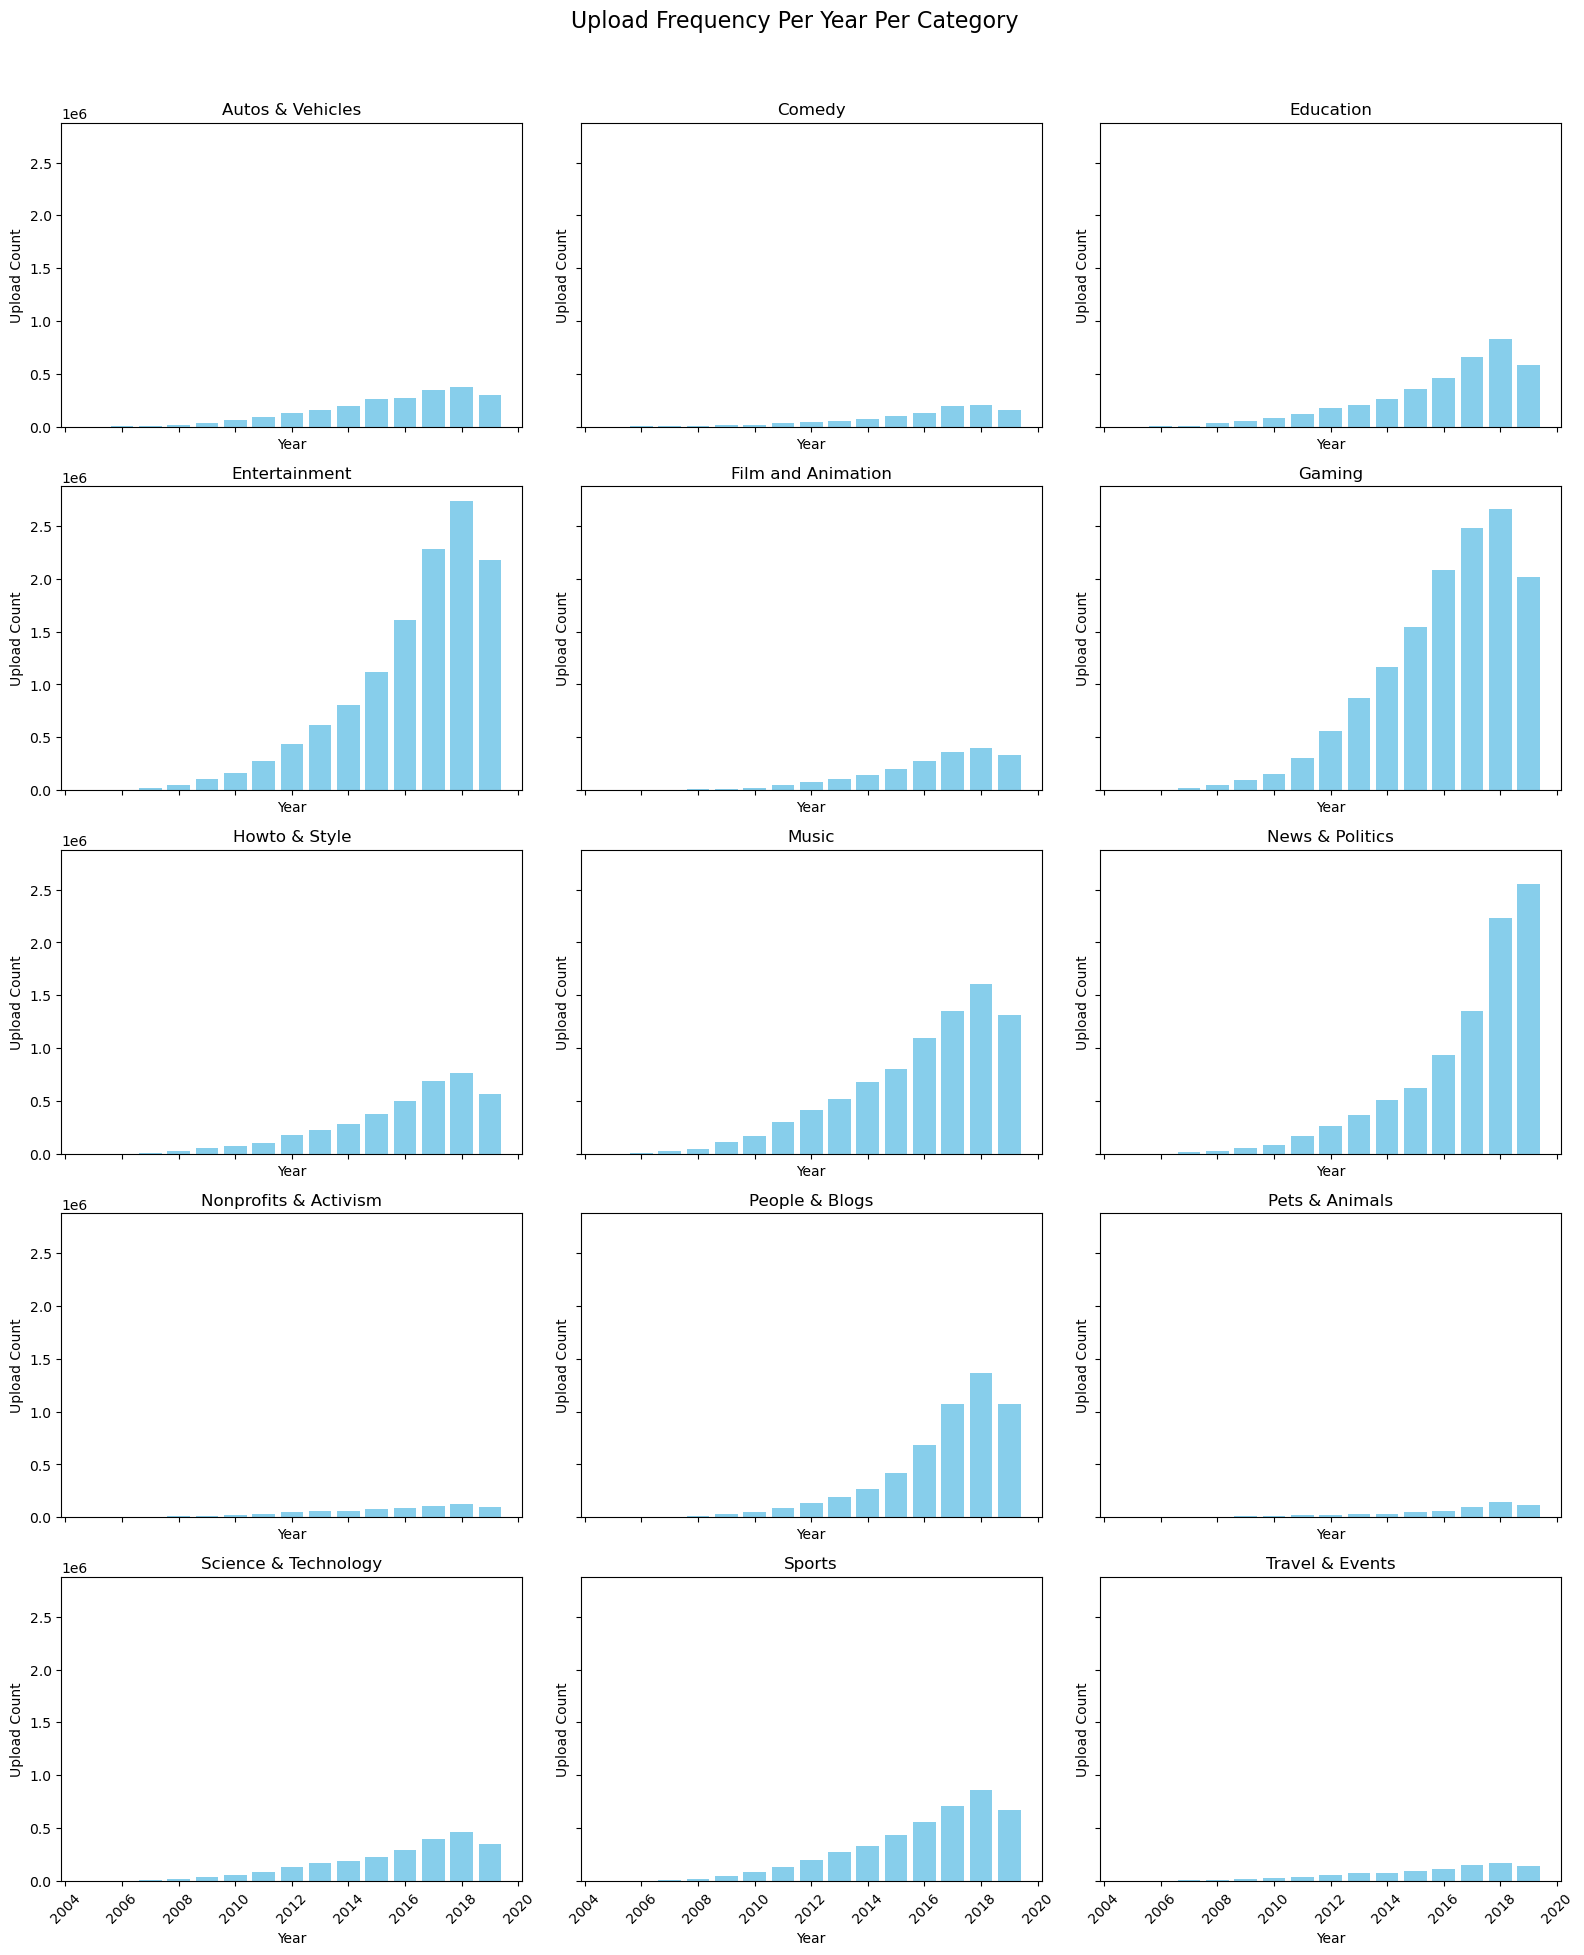

In [33]:
# Group by channel category and year to calculate upload frequency
yearly_frequency = frequency_analysis.groupby(['channel_category', 'year']).agg({'upload_count': 'sum'}).reset_index()

# Get the unique categories
categories = yearly_frequency['channel_category'].unique()

# Number of subplots
n_categories = len(categories)
n_cols = 3
n_rows = 5

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each category in a separate subplot
for i, category in enumerate(categories):
    # Filter data for the category
    category_data = yearly_frequency[yearly_frequency['channel_category'] == category]
    axes[i].bar(category_data['year'], category_data['upload_count'], color='skyblue')
    
    # Customize the subplot
    axes[i].set_title(category)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Upload Count")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.suptitle("Upload Frequency Per Year Per Category", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


The categories that witnessed the biggest upload growth over the years are: Music, News & Politics, Gaming, Entertainment and People & Blog. Their growth might indicate a professionalization that could be correlated with the consistency analysis.

Categories such as Nonprofits & Activism, Autos & Vehicles, and Travel & Events show limited upload activity, reflecting niche or seasonal trends.

Overall, this graph illustrates how YouTube’s growth is largely driven by specific categories, with Gaming, Entertainment, Education and News & Politics emerging as central pillars. This aligns with the platform's transition into a professional career hub, as creators in these categories adopt consistent and frequent upload strategies to engage larger audiences.

#### Upload Frequency per Channel

In [34]:
# Count uploads per channel
channel_uploads = channel_video_data.groupby(['channel_id', 'channel_category']).size().reset_index(name='upload_count')

# Compute average uploads per channel for each category
average_uploads_per_category = channel_uploads.groupby('channel_category')['upload_count'].mean().reset_index(name='avg_uploads_per_channel')

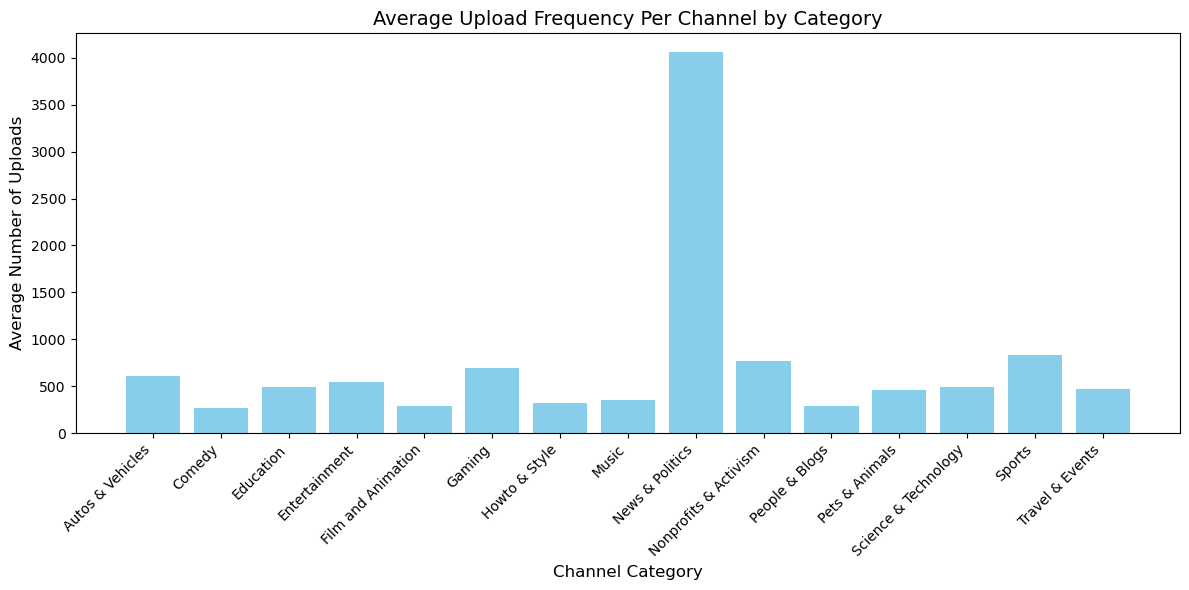

In [35]:
plt.figure(figsize=(12, 6))
plt.bar(average_uploads_per_category['channel_category'], average_uploads_per_category['avg_uploads_per_channel'], color='skyblue')

# Customize the plot
plt.title("Average Upload Frequency Per Channel by Category", fontsize=14)
plt.xlabel("Channel Category", fontsize=12)
plt.ylabel("Average Number of Uploads", fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate category names for better readability
plt.tight_layout()

# Show the plot
plt.show()

The category 'News & Politics' exhibits the highest average upload frequency per channel by far. The possible reason for this could be due to the fact that news are time-sensitive content: updates need to be uploaded frequently to stay relevant.

The categories 'Gaming' and 'Sports' also exhibit relatively high upload frequencies.

Analyzing engagement metrics (views, likes, dislikes) would help understand if high upload frequency correlates with better audience engagement for these categories.

#### Relationship with Engagement

We will try to analyse if the frequency of uploads have a relationship with any engagement metrics such as subscribers count, views count, likes count and dislikes count.

##### Channels Engagement

We analyse in this part if engagement metrics with respect to channels have some correlation with upload frequency.

In [36]:
# Aggregate upload frequency, engagement metrics, and additional channel data
channel_engagement = channel_video_data.groupby('channel_id').agg({
    'upload_date': 'count',        # Total uploads (frequency)
    'view_count': 'sum',           # Total views per channel
    'like_count': 'sum',           # Total likes per channel
    'dislike_count': 'sum',        # Total dislikes per channel
    'subscribers_cc': 'first',     # Number of subscribers (assuming it's constant for a channel)
}).reset_index()

# Rename columns for clarity
channel_engagement.rename(columns={
    'upload_date': 'upload_frequency',
    'view_count': 'total_views_per_channel',
    'like_count': 'total_likes_per_channel',
    'dislike_count': 'total_dislikes_per_channel',
    'subscribers_cc': 'subscribers',
}, inplace=True)

print(channel_engagement.head())

                 channel_id  upload_frequency  total_views_per_channel  \
0  UC--24Q3_ZQeFmgJE-Um5QZQ               189                3291383.0   
1  UC--2EbuIuBOGgGqPiJxi3rg                60                7999515.0   
2  UC--3c8RqSfAqYBdDjIG3UNA               333               63626751.0   
3  UC--3ozenTzry39-xMqAPQlw                43                5192527.0   
4  UC--6E6EpybocdaNlPhvK_9A                31                9317278.0   

   total_likes_per_channel  total_dislikes_per_channel  subscribers  
0                  64823.0                      1544.0        17308  
1                  38553.0                      2383.0        13869  
2                 323791.0                     20737.0        73523  
3                  35760.0                       952.0       108000  
4                 226691.0                      6142.0        93900  


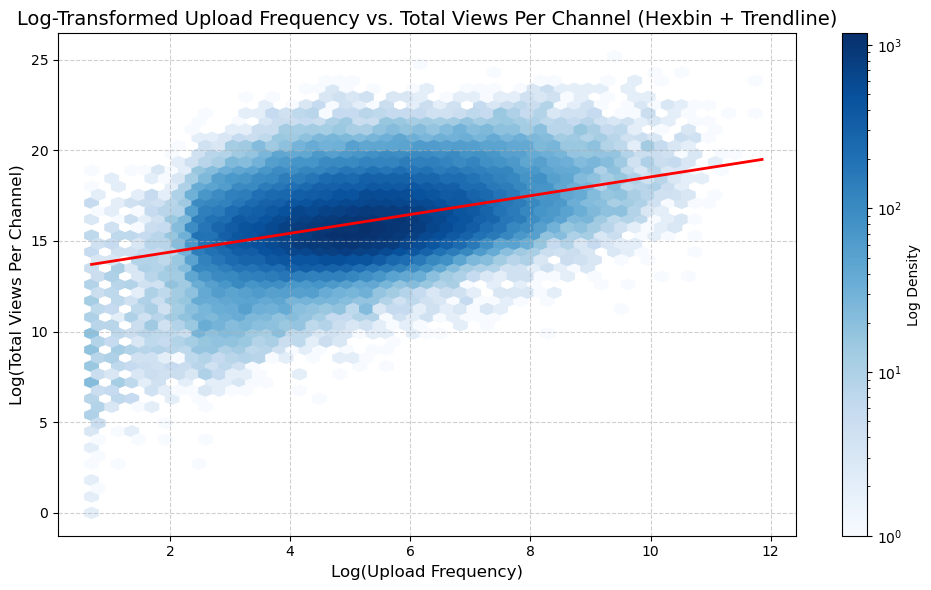

In [37]:
# Log-transform upload frequency and view count
channel_engagement['log_upload_frequency'] = np.log1p(channel_engagement['upload_frequency'])
channel_engagement['log_view_count'] = np.log1p(channel_engagement['total_views_per_channel'])

plt.figure(figsize=(10, 6))
plt.hexbin(
    x=channel_engagement['log_upload_frequency'], 
    y=channel_engagement['log_view_count'], 
    gridsize=50, 
    cmap='Blues', 
    bins='log'
)

sns.regplot(
    x='log_upload_frequency',
    y='log_view_count',
    data=channel_engagement,
    scatter=False,
    color='red',
    line_kws={"lw": 2}
)

plt.colorbar(label='Log Density')
plt.title("Log-Transformed Upload Frequency vs. Total Views Per Channel (Hexbin + Trendline)", fontsize=14)
plt.xlabel("Log(Upload Frequency)", fontsize=12)
plt.ylabel("Log(Total Views Per Channel)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

The red trendline indicates a positive relationship between the log-transformed upload frequency and log-transformed total views per channel. Channels that upload more frequently tend to accumulate more total views, suggesting that higher activity can lead to greater visibility and engagement over time.

The relationship is not perfectly linear (as indicated by the spread), meaning other factors, such as video quality or channel size, also influence total views.

The dark blue hexagons show that the majority of channels fall within the lower range of upload frequency (log ~2–6) and total views (log ~10–15). Most channels upload infrequently but still achieve moderate total views, possibly reflecting part-time or casual content creators.

As the upload frequency increases (log > 6), the density decreases, but total views tend to remain high. This could indicate that only a small proportion of channels maintain a high upload frequency, and these channels are often professional creators or part of high-demand categories (e.g., Gaming or News).

In [38]:
correlation_channel = channel_engagement[['upload_frequency', 'total_views_per_channel', 'total_likes_per_channel', 'total_dislikes_per_channel', 'subscribers']].corr()

print("Correlation Matrix:")
correlation_channel.round(2).style.background_gradient(cmap='coolwarm').format("{:.2f}")

Correlation Matrix:


,upload_frequency,total_views_per_channel,total_likes_per_channel,total_dislikes_per_channel,subscribers
upload_frequency,1.00,0.18,0.14,0.16,0.14
total_views_per_channel,0.18,1.00,0.70,0.82,0.79
total_likes_per_channel,0.14,0.70,1.00,0.64,0.75
total_dislikes_per_channel,0.16,0.82,0.64,1.00,0.73
subscribers,0.14,0.79,0.75,0.73,1.00


For channels, we see that upload frequency has little correlation with any of the engagement metrics. There are slight positive correlation between upload frequency and views, likes, dislikes and subscribers per channel.

These small correlations might be explained by the diversity between channels. For example, we could have some channels that got very high total views with just a few uploads while other channels got decent total views with a very high amount of uploads.

That is why we will analyse these same engagements metrics but with respect to the category of the channels. Moreover, later in the notebook, we will analyse the distribution of the upload frequency of channels to see if most views from a category come from a handful number of channels in this same category.

##### Categories Engagement

We analyse in this part if engagement metrics with respect to categories have some correlation with upload frequency.

In [39]:
# Deduplicate the channel-level data to avoid double-counting subscribers and videos
unique_channel_data = channel_video_data[['channel_id', 'channel_category', 'subscribers_cc']].drop_duplicates(subset='channel_id')

# Aggregate engagement metrics and additional data per category
category_engagement = channel_video_data.groupby('channel_category').agg({
    'upload_date': 'count',        # Total uploads per category
    'view_count': 'sum',           # Total views per category
    'like_count': 'sum',           # Total likes per category
    'dislike_count': 'sum'         # Total dislikes per category
}).reset_index()

# Aggregate unique channel-level metrics (subscribers, videos) per category
unique_channel_aggregation = unique_channel_data.groupby('channel_category').agg({
    'subscribers_cc': 'sum',        # Total unique subscribers per category
}).reset_index()

# Merge the two aggregations
category_engagement = pd.merge(category_engagement, unique_channel_aggregation, on='channel_category')

# Rename columns for clarity
category_engagement.rename(columns={
    'upload_date': 'total_uploads',
    'view_count': 'total_views',
    'like_count': 'total_likes',
    'dislike_count': 'total_dislikes',
    'subscribers_cc': 'total_subscribers',
}, inplace=True)

print(category_engagement)

         channel_category  total_uploads   total_views   total_likes  \
0        Autos & Vehicles        2243805  1.182867e+11  9.449940e+08   
1                  Comedy        1020013  3.266239e+11  5.901085e+09   
2               Education        3824752  4.807396e+11  3.028110e+09   
3           Entertainment       12395353  2.310885e+12  2.114761e+10   
4      Film and Animation        1981070  5.206990e+11  3.374969e+09   
5                  Gaming       14017299  1.068579e+12  1.779855e+10   
6           Howto & Style        3819229  3.982713e+11  5.623876e+09   
7                   Music        8420691  2.476947e+12  1.914191e+10   
8         News & Politics        9165234  1.690045e+11  2.049961e+09   
9   Nonprofits & Activism         745835  1.943457e+10  2.367161e+08   
10         People & Blogs        5395696  5.144447e+11  8.370012e+09   
11         Pets & Animals         586236  6.784351e+10  6.212901e+08   
12   Science & Technology        2403432  1.723169e+11  1.937676

In [40]:
print(category_engagement['total_subscribers'].describe())

count    1.500000e+01
mean     2.237845e+09
std      2.448694e+09
min      9.154892e+07
25%      5.391141e+08
50%      1.560583e+09
75%      2.812357e+09
max      8.030449e+09
Name: total_subscribers, dtype: float64


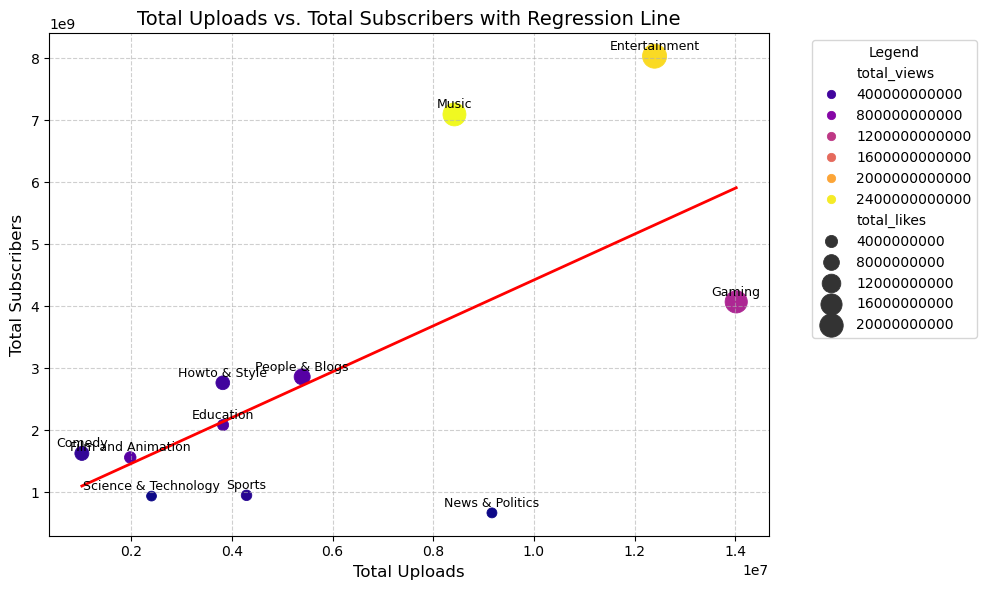

In [41]:
# Set the threshold to the 25th percentile to remove from the plots the categories with
# fewer subscribers that overlap too much for readability in the scatter plot
threshold = 5.39e8  # 539 million subscribers
filtered_category_engagement = category_engagement[category_engagement['total_subscribers'] > threshold]

# Scatter plot for Total Uploads vs. Total Subscribers (filtered) with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='total_uploads', 
    y='total_subscribers', 
    data=filtered_category_engagement, 
    size='total_likes', 
    hue='total_views', 
    palette='plasma', 
    sizes=(50, 300),
    edgecolor=None
)

# Add the regression line
sns.regplot(
    x='total_uploads', 
    y='total_subscribers', 
    data=filtered_category_engagement, 
    scatter=False,
    color='red', 
    line_kws={'lw': 2},
    ci=None
)

# Add category labels just above the bubbles
for i in range(len(filtered_category_engagement)):
    plt.text(
        x=filtered_category_engagement['total_uploads'].iloc[i],
        y=filtered_category_engagement['total_subscribers'].iloc[i] + 0.05e9,
        s=filtered_category_engagement['channel_category'].iloc[i],
        fontsize=9,
        ha='center',
        va='bottom',
        color='black',
        bbox=dict(facecolor='white', alpha=0, edgecolor='none')
    )

# Customize the plot
plt.title("Total Uploads vs. Total Subscribers with Regression Line", fontsize=14)
plt.xlabel("Total Uploads", fontsize=12)
plt.ylabel("Total Subscribers", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), title="Legend")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The red regression line shows a positive trend: as the total uploads increase, the total number of subscribers also tends to increase.

Categories with higher upload activity often have larger subscriber bases, likely because frequent uploads keep the audience engaged and attract more subscribers over time. However, the spread around the regression line suggests variability, meaning upload frequency alone does not fully determine subscriber count.

In [42]:
correlation_category = category_engagement[['total_uploads', 'total_views', 'total_likes', 'total_dislikes', 'total_subscribers']].corr()

print("Correlation Matrix:")
correlation_category.style.background_gradient(cmap='coolwarm').format("{:.2f}")

Correlation Matrix:


,total_uploads,total_views,total_likes,total_dislikes,total_subscribers
total_uploads,1.00,0.70,0.82,0.80,0.74
total_views,0.70,1.00,0.93,0.93,0.97
total_likes,0.82,0.93,1.00,0.93,0.96
total_dislikes,0.80,0.93,0.93,1.00,0.96
total_subscribers,0.74,0.97,0.96,0.96,1.00


The upload frequency at the category-level is highly correlated with engagement metrics (0.70 for the views, 0.82 for the likes, 0.79 for the dislikes and 0.74 for the subscribers).

These correlations are higher at the category-level compared to the channel-level. This might indicate that the variability in upload frequency or engagement metrics between individual channels within a category averages out when aggregated.

That is why, it seems more interesting to analyse the frequency and consistency at the category-level to have a broader view and 'cancel' out disparities and variability between channels.

#### Long-Tail Analysis

We will analyse whether the majority of uploads and views in categories come from a few dominant channels or if the distribution is more uniform.

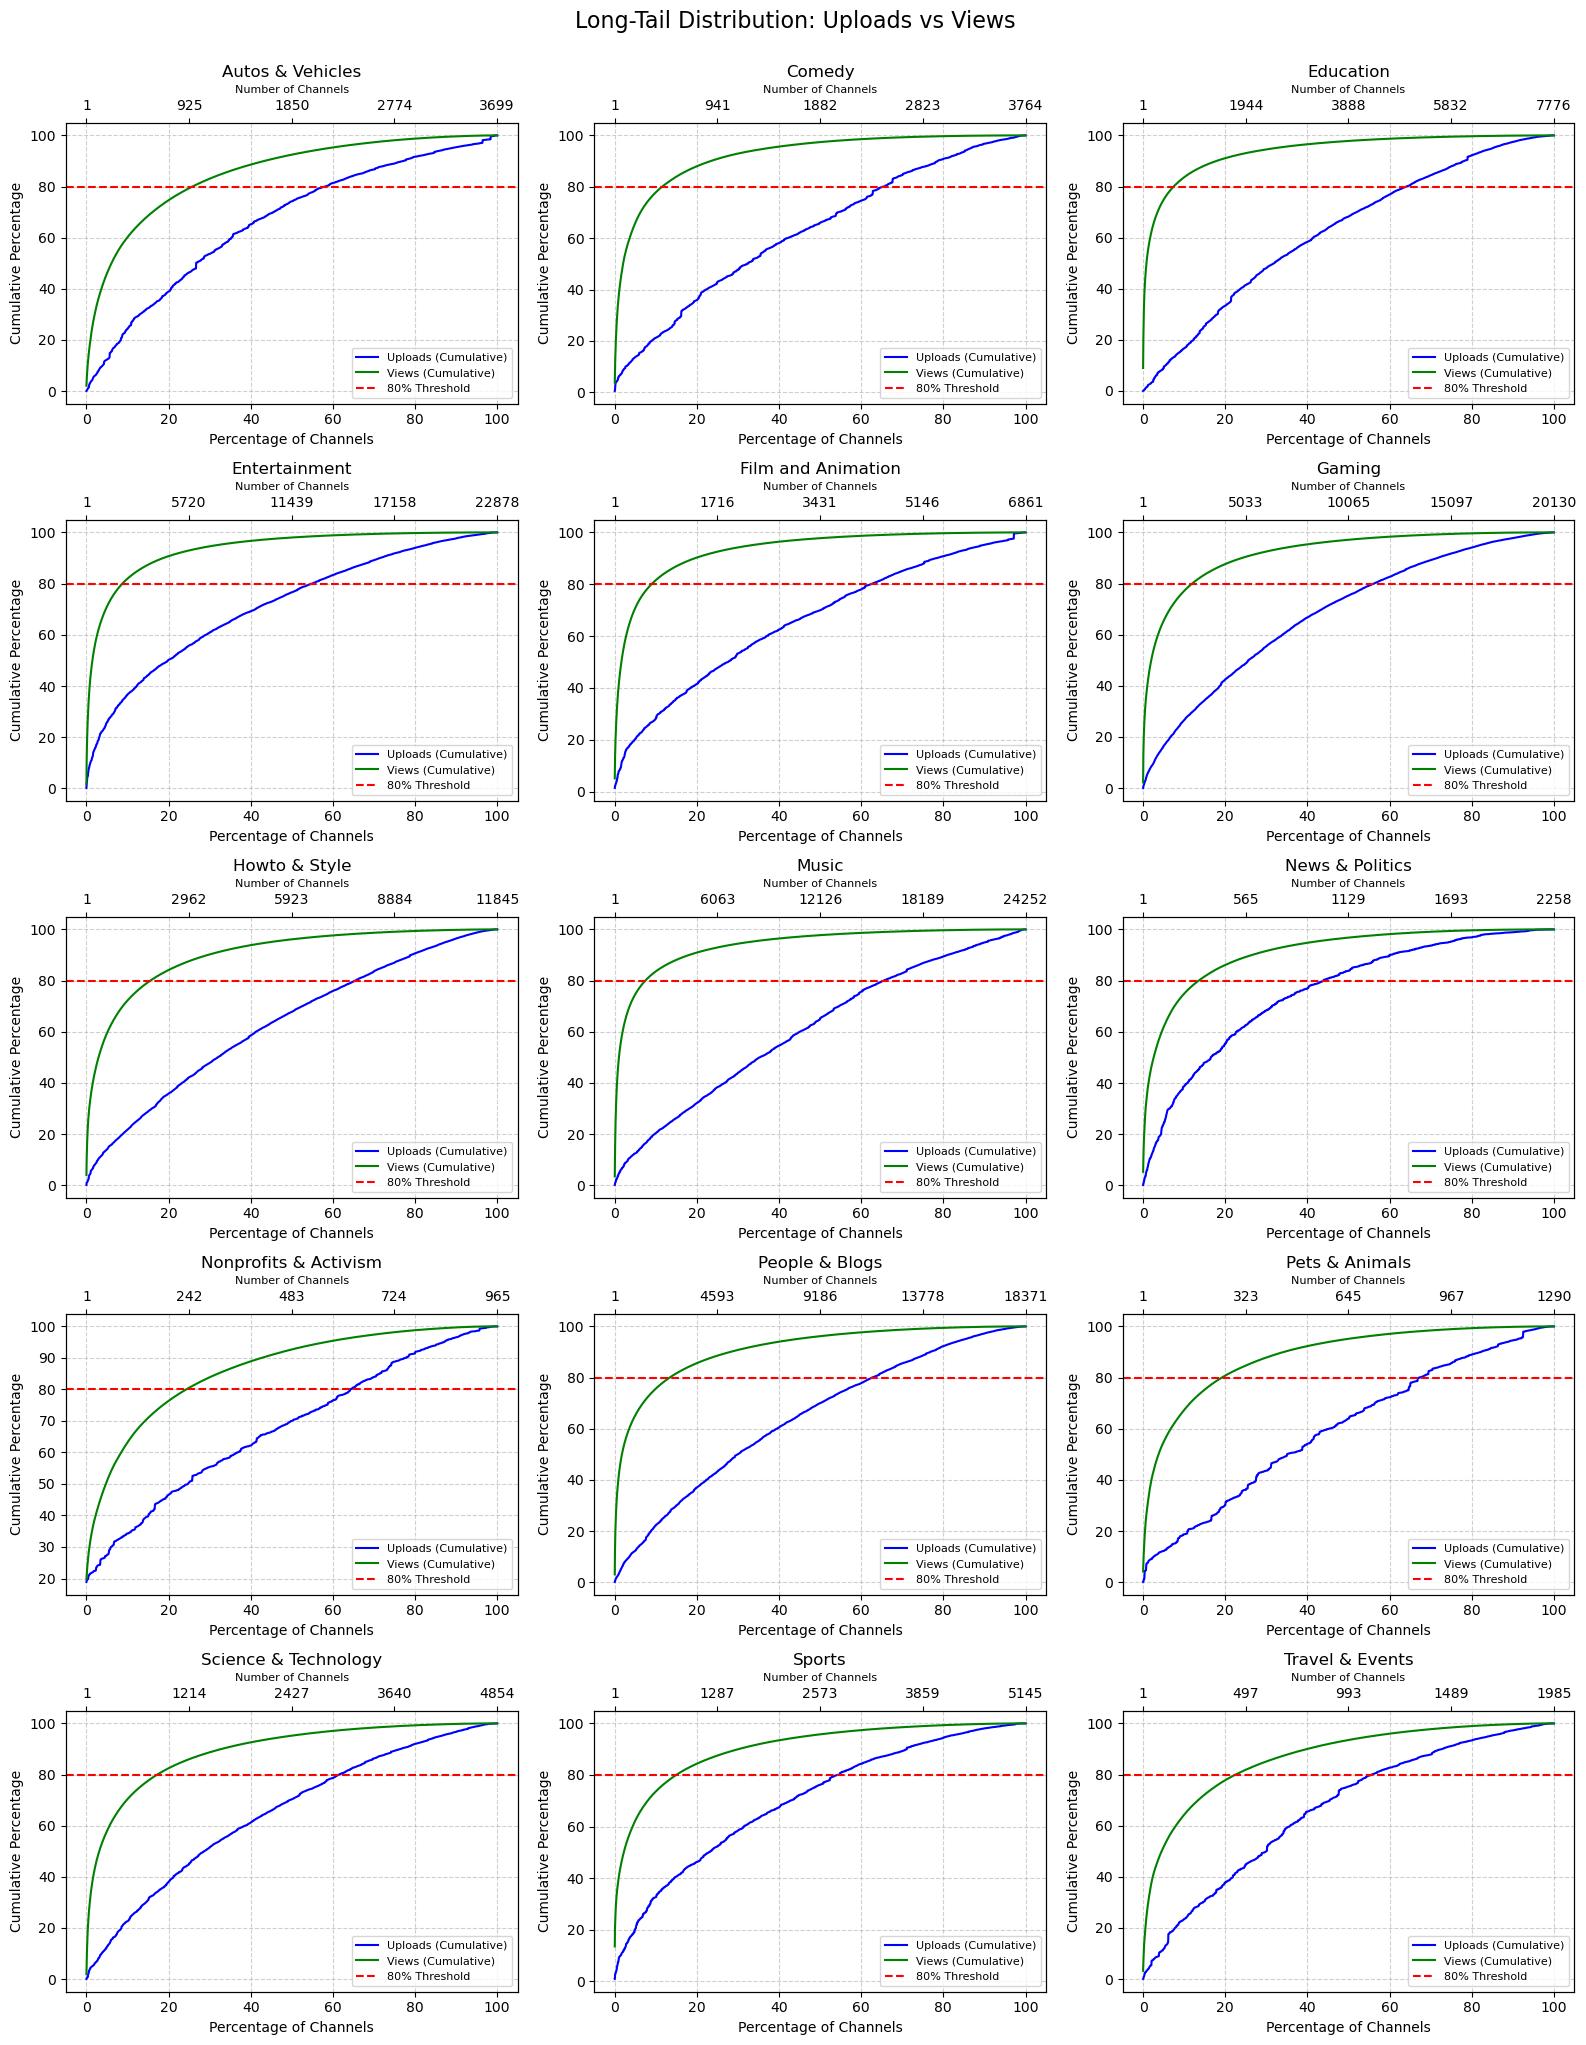

In [43]:
# Aggregate data per channel
channel_contribution = channel_video_data.groupby(['channel_category', 'channel_id']).agg({
    'upload_date': 'count',    # Total uploads per channel
    'view_count': 'sum'        # Total views per channel
}).reset_index()

channel_contribution.rename(columns={
    'upload_date': 'total_uploads',
    'view_count': 'total_views'
}, inplace=True)

# Normalize within each category
channel_contribution['upload_percentage'] = channel_contribution.groupby('channel_category')['total_uploads'].transform(lambda x: x / x.sum() * 100)
channel_contribution['view_percentage'] = channel_contribution.groupby('channel_category')['total_views'].transform(lambda x: x / x.sum() * 100)

categories = channel_contribution['channel_category'].unique()

n_cols = 3
n_rows = int(np.ceil(len(categories) / n_cols))

# Create a figure with subplots
fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(16, n_rows * 4),
    sharex=False,
    sharey=False
)

axes = axes.flatten()

for i, category in enumerate(categories):
    # Filter and sort the subset
    subset = channel_contribution[channel_contribution['channel_category'] == category]
    subset = subset.sort_values(by='view_percentage', ascending=False).reset_index()

    # Calculate cumulative percentages
    cumulative_uploads = subset['upload_percentage'].cumsum()
    cumulative_views = subset['view_percentage'].cumsum()
    
    # Calculate x-axis values
    x_percentage = np.linspace(0, 100, len(subset))  # Percentage of channels
    x_channels = np.arange(1, len(subset) + 1)       # Absolute number of channels

    # Get the subplot axis
    ax = axes[i]

    # Plot uploads and views
    ax.plot(x_percentage, cumulative_uploads, label='Uploads (Cumulative)', color='blue')
    ax.plot(x_percentage, cumulative_views, label='Views (Cumulative)', color='green')
    
    # Add secondary x-axis for the number of channels
    ax2 = ax.twiny()
    ax2.set_xlim(ax.get_xlim())  # Match x-axis limits
    ax2.set_xticks(np.linspace(0, 100, 5))  # Match percentage scale for better alignment
    ax2.set_xticklabels(np.linspace(1, len(subset), 5, dtype=int))  # Actual channel numbers
    
    # Customize secondary x-axis
    ax2.set_xlabel("Number of Channels", fontsize=8)

    # Add titles and labels
    ax.set_title(f"{category}", fontsize=12)
    ax.set_xlabel("Percentage of Channels", fontsize=10)
    ax.set_ylabel("Cumulative Percentage", fontsize=10)
    ax.axhline(80, color='red', linestyle='--', label="80% Threshold")
    ax.legend(loc='lower right', fontsize=8)
    ax.grid(True, linestyle='--', alpha=0.6)

# Hide unused subplots (if categories are fewer than the grid)
for j in range(len(categories), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.suptitle("Long-Tail Distribution: Uploads vs Views", fontsize=16, y=1.02)
plt.show()

In the plots above, we sorted the channels in descending order with respect to the number of views (i.e. the first channels in the x-axis are the channels with the most views).

As we can see from the plots, we attain for almost every categories 80 % of the total views of the category with less than 20 % of the channels in this category. This means that a small amount of channels have an extremely high number of views that contribute to the success of their respective categories.

Whereas, the uploads cumulative curve being more gradual indicates that the channels that have the biggest impact on views are not necessarily the channels that have the highest upload frequency.

## Consistency Analysis

Consistency measures the regularity of video uploads within a channel category over a specific time period. It reflects how evenly spaced or predictable the uploads are across time, providing insight into the stability of content creation behavior.

High consistency indicates uploads occur at regular intervals. Low consistency indicates irregular or sporadic uploads.

Channels that upload consistently are often more professional, as they follow a predictable schedule. High consistency often correlates with better audience retention and channel growth.

Consistency will be measured as the standard deviation of upload frequency and in variation of active periods, for example what is the average time period between two uploaded videos in a certain category ?

In [44]:
category_monthly_data = channel_video_data.groupby(['channel_category', 'channel_id', 'upload_date']).agg({
    'view_count': 'sum',  # Total views per time period
    'upload_date': 'count'  # Total uploads per time period
}).rename(columns={'upload_date': 'uploads'}).reset_index()

# Add a 'year_month' column for monthly aggregation
category_monthly_data['year_month'] = category_monthly_data['upload_date'].dt.to_period('M')

print(category_monthly_data.head())

   channel_category                channel_id upload_date  view_count  \
0  Autos & Vehicles  UC--aOG_a2afAna8t3xvRkuw  2017-01-21       900.0   
1  Autos & Vehicles  UC--aOG_a2afAna8t3xvRkuw  2017-02-03      2393.0   
2  Autos & Vehicles  UC--aOG_a2afAna8t3xvRkuw  2017-02-12       456.0   
3  Autos & Vehicles  UC--aOG_a2afAna8t3xvRkuw  2017-02-19       749.0   
4  Autos & Vehicles  UC--aOG_a2afAna8t3xvRkuw  2017-02-23       914.0   

   uploads year_month  
0        1    2017-01  
1        1    2017-02  
2        1    2017-02  
3        1    2017-02  
4        1    2017-02  


In [45]:
# Calculate consistency metrics per channel
channel_metrics = category_monthly_data.groupby(['channel_category', 'channel_id']).agg({
    'uploads': ['sum', 'mean', 'std'],  # Total, mean, and standard deviation of uploads
    'view_count': ['sum', 'mean', 'std']  # Total, mean, and standard deviation of views
}).reset_index()

# Flatten the column names
channel_metrics.columns = ['channel_category', 'channel_id', 'total_uploads', 'avg_uploads', 'std_uploads', 
                           'total_views', 'avg_views', 'std_views']

print(channel_metrics.head())

   channel_category                channel_id  total_uploads  avg_uploads  \
0  Autos & Vehicles  UC--aOG_a2afAna8t3xvRkuw             52     1.000000   
1  Autos & Vehicles  UC-1CvlOVGAUzvffUyLOQ0hA            137     1.191304   
2  Autos & Vehicles  UC-1PkmLrFt6apyXAnB0LbNw            304     1.048276   
3  Autos & Vehicles  UC-1W6GKASWrqZfK45zFLapg            202     1.020202   
4  Autos & Vehicles  UC-31-rclcsuDPqfwh-rENuw             49     1.000000   

   std_uploads  total_views     avg_views      std_views  
0     0.000000    3458632.0  66512.153846  416692.469833  
1     0.748046    1532540.0  13326.434783   20142.921714  
2     0.230271   22064189.0  76083.410345  474461.473885  
3     0.224391    9576806.0  48367.707071  153731.365137  
4     0.000000    3149696.0  64279.510204  263573.820605  


In [46]:
# Count active months with at least 2 uploads per channel
active_months = category_monthly_data[category_monthly_data['uploads'] >= 2].groupby(['channel_category', 'channel_id'])['year_month'].nunique()

# Merge active months into channel_metrics
channel_metrics = channel_metrics.merge(active_months.rename('active_months'), on=['channel_category', 'channel_id'], how='left')

# Fill missing active_months with 0 (channels that never had an active month)
channel_metrics['active_months'] = channel_metrics['active_months'].fillna(0)

# Calculate proportion of active months
total_months = category_monthly_data['year_month'].nunique()  # Total number of unique months
channel_metrics['proportion_active'] = channel_metrics['active_months'] / total_months

print(channel_metrics.head())

   channel_category                channel_id  total_uploads  avg_uploads  \
0  Autos & Vehicles  UC--aOG_a2afAna8t3xvRkuw             52     1.000000   
1  Autos & Vehicles  UC-1CvlOVGAUzvffUyLOQ0hA            137     1.191304   
2  Autos & Vehicles  UC-1PkmLrFt6apyXAnB0LbNw            304     1.048276   
3  Autos & Vehicles  UC-1W6GKASWrqZfK45zFLapg            202     1.020202   
4  Autos & Vehicles  UC-31-rclcsuDPqfwh-rENuw             49     1.000000   

   std_uploads  total_views     avg_views      std_views  active_months  \
0     0.000000    3458632.0  66512.153846  416692.469833            0.0   
1     0.748046    1532540.0  13326.434783   20142.921714            8.0   
2     0.230271   22064189.0  76083.410345  474461.473885            8.0   
3     0.224391    9576806.0  48367.707071  153731.365137            1.0   
4     0.000000    3149696.0  64279.510204  263573.820605            0.0   

   proportion_active  
0           0.000000  
1           0.045977  
2           0.045

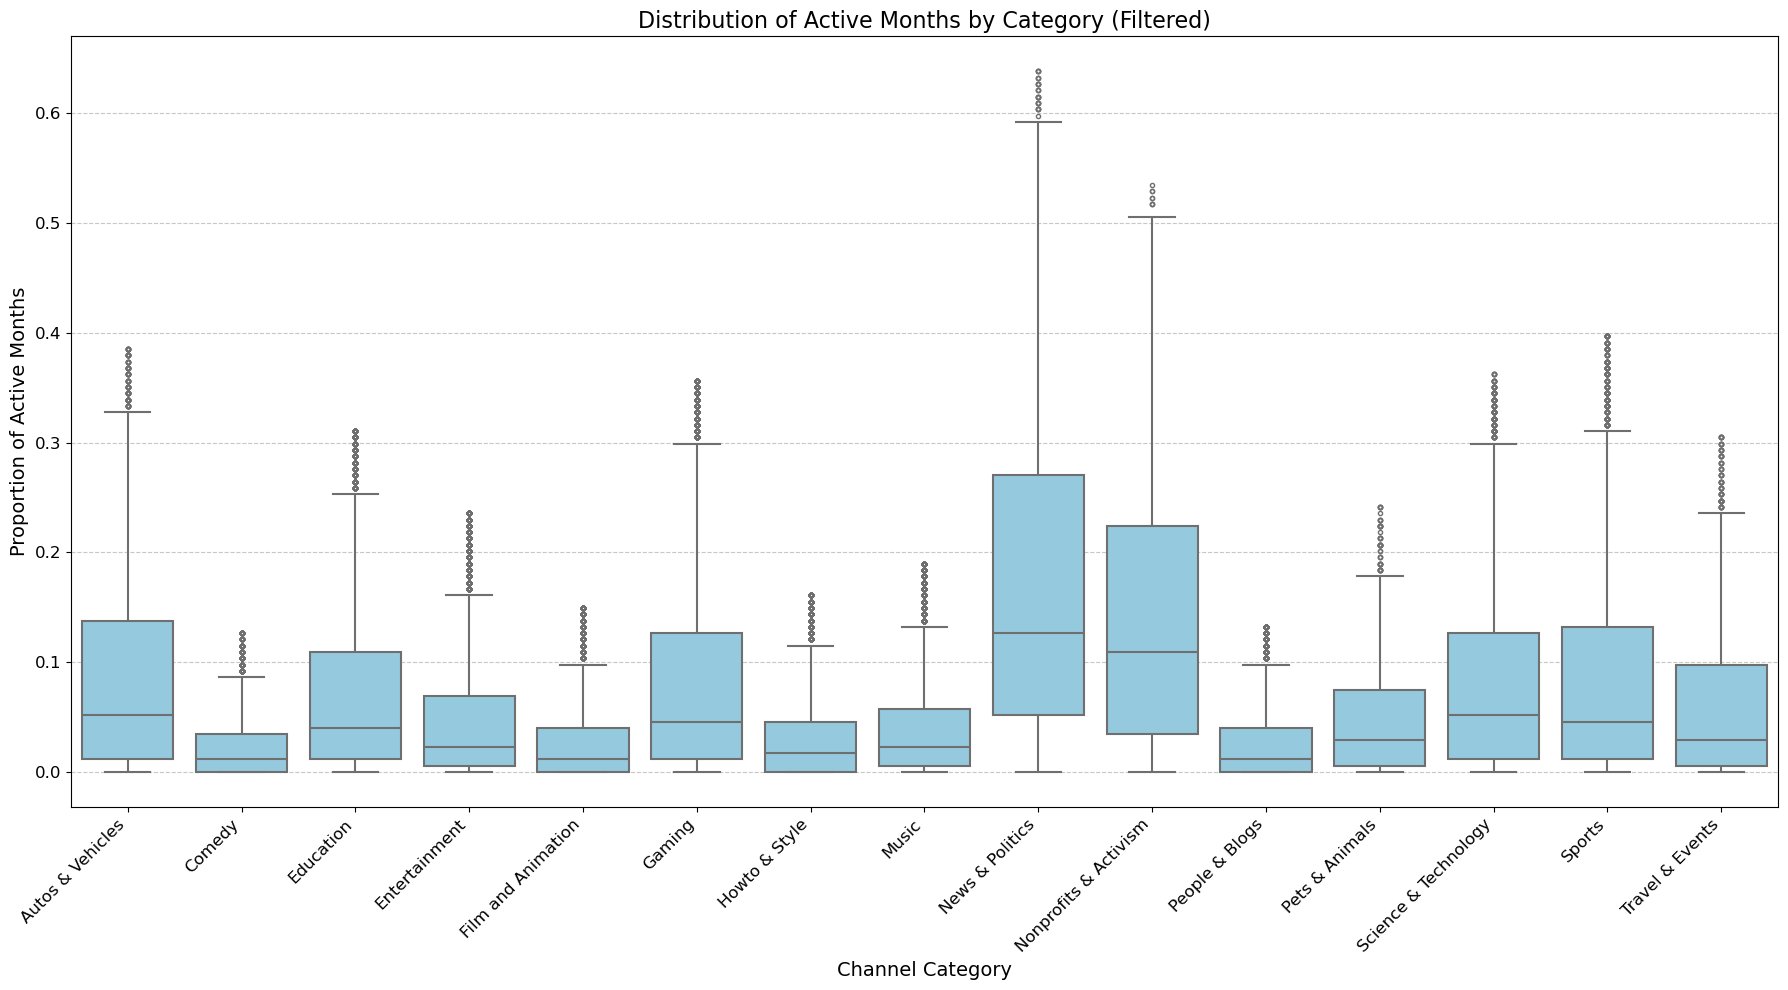

In [47]:
# Calculate IQR for each category
Q1 = channel_metrics.groupby('channel_category')['proportion_active'].quantile(0.25)
Q3 = channel_metrics.groupby('channel_category')['proportion_active'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = (Q1 - 1.5 * IQR).reindex(channel_metrics['channel_category'])
upper_bound = (Q3 + 1.5 * IQR).reindex(channel_metrics['channel_category'])

# Filter out outliers
filtered_channel_metrics = channel_metrics[
    (channel_metrics['proportion_active'] >= lower_bound.values) &
    (channel_metrics['proportion_active'] <= upper_bound.values)
]


plt.figure(figsize=(18, 10))
sns.boxplot(
    data=filtered_channel_metrics,
    x='channel_category',
    y='proportion_active',
    color='skyblue',
    fliersize=3,
    linewidth=1.5
)


plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title("Distribution of Active Months by Category (Filtered)", fontsize=16)
plt.ylabel("Proportion of Active Months", fontsize=14)
plt.xlabel("Channel Category", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

This plot provides an analysis of the proportion of active months for channels in each category, where an active month is defined as a month with at least 2 uploads. The outliers have been filtered out using the Interquartile Range (IQR) rule, ensuring that the focus remains on typical channel behavior within each category.

The box represents the interquartile range (IQR), which contains the middle 50% of the data. The line inside the box represents the median proportion of active months for channels in each category. The whiskers extend to the smallest and largest data points within 1.5 times the IQR from the lower and upper quartiles, respectively.

Categories like News & Politics and Nonprofits & Activism show a much wider distribution (large IQR and whiskers), indicating significant variability in channel consistency within these categories.

Categories such as Comedy and People & Blogs have much narrower distributions, suggesting more uniform activity levels among channels in these categories.

The height of the boxes and length of the whiskers indicate the diversity in the consistency of uploads. Categories with larger boxes and whiskers exhibit greater diversity in channel activity, while smaller boxes and whiskers indicate more homogeneity.

Categories with larger IQRs and higher medians, like News & Politics, likely have more professional channels with consistent uploading schedules.

Categories with smaller IQRs and lower medians, like Comedy, might have less predictable upload schedules or smaller numbers of active channels.

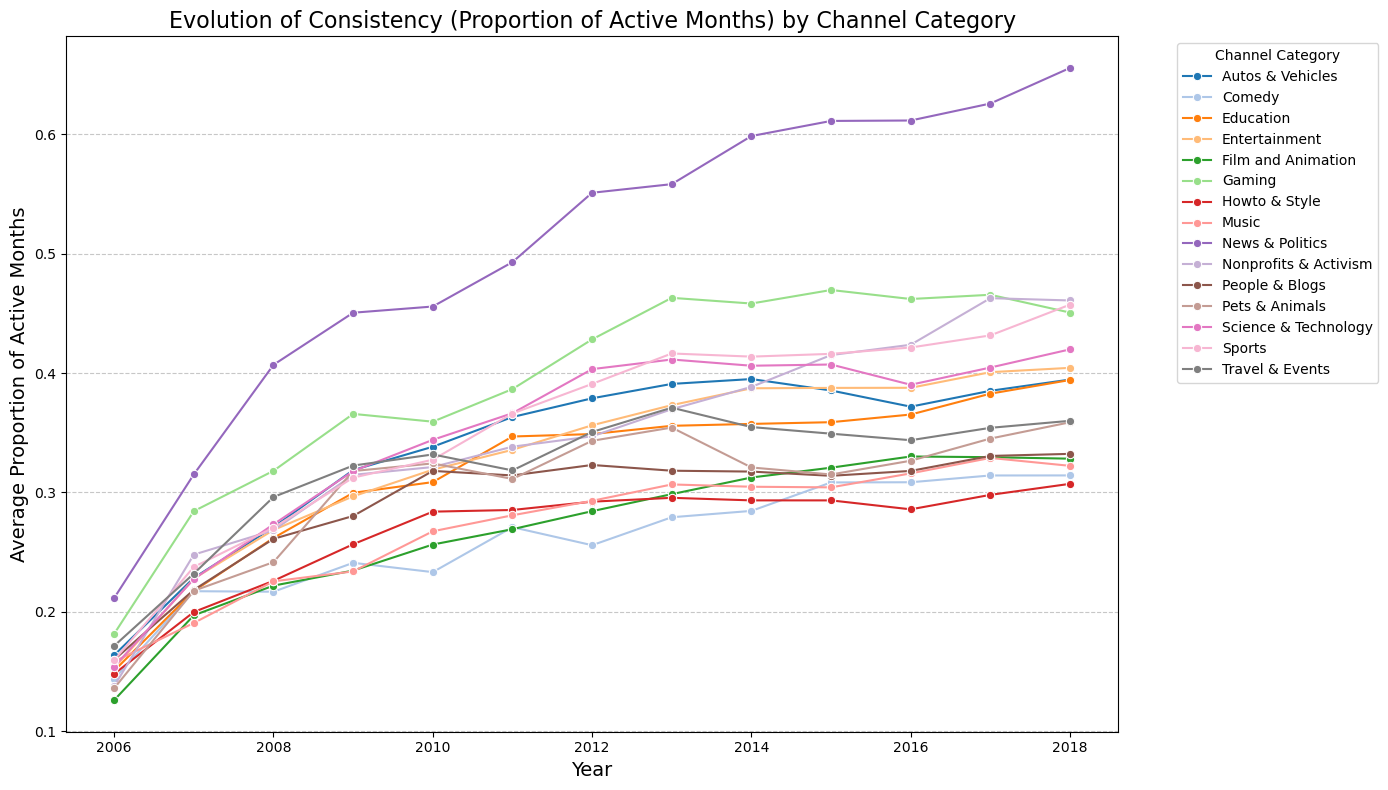

In [48]:
# Add a 'year' column to the dataset
category_monthly_data['year'] = category_monthly_data['year_month'].dt.year

# Calculate active months for each channel per year and category
yearly_active_months = category_monthly_data[category_monthly_data['uploads'] >= 2].groupby(
    ['channel_category', 'channel_id', 'year']
)['year_month'].nunique().reset_index()

yearly_active_months.rename(columns={'year_month': 'active_months'}, inplace=True)

# Calculate yearly average proportion of active months for each category
total_months_per_year = 12
yearly_active_months['proportion_active'] = yearly_active_months['active_months'] / total_months_per_year

# Aggregate by category and year to compute the mean proportion of active months
category_yearly_consistency = yearly_active_months.groupby(['channel_category', 'year'])['proportion_active'].mean().reset_index()

# Filter data to include only years up to 2018 because we don't have data for thw whole year 2019
filtered_consistency_data = category_yearly_consistency[
    (category_yearly_consistency['year'] >= 2006) & 
    (category_yearly_consistency['year'] <= 2018)
]

custom_palette = sns.color_palette("tab20", n_colors=15)

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_consistency_data,
    x='year',
    y='proportion_active',
    hue='channel_category',
    palette=custom_palette,
    marker='o'
)

plt.title("Evolution of Consistency (Proportion of Active Months) by Channel Category", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Average Proportion of Active Months", fontsize=14)
plt.legend(title="Channel Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

The plot above suggests that the consistency of channels has grown over time. This might indicate that YouTube has evolved as a platform over time and became more professionalized. Obviously the category 'News & Politics' seems to have high consistency due to the nature of its subject (news are time-sensitive and need to be updated all the time).

Creators became more and more consistent in their behavior of content creation over time, suggesting that creators are taking their content creation hobby more seriously and potentially pointing out that it's not about just creating some videos for fun but it's about making new content in a more serious manner maybe indicating a profession.

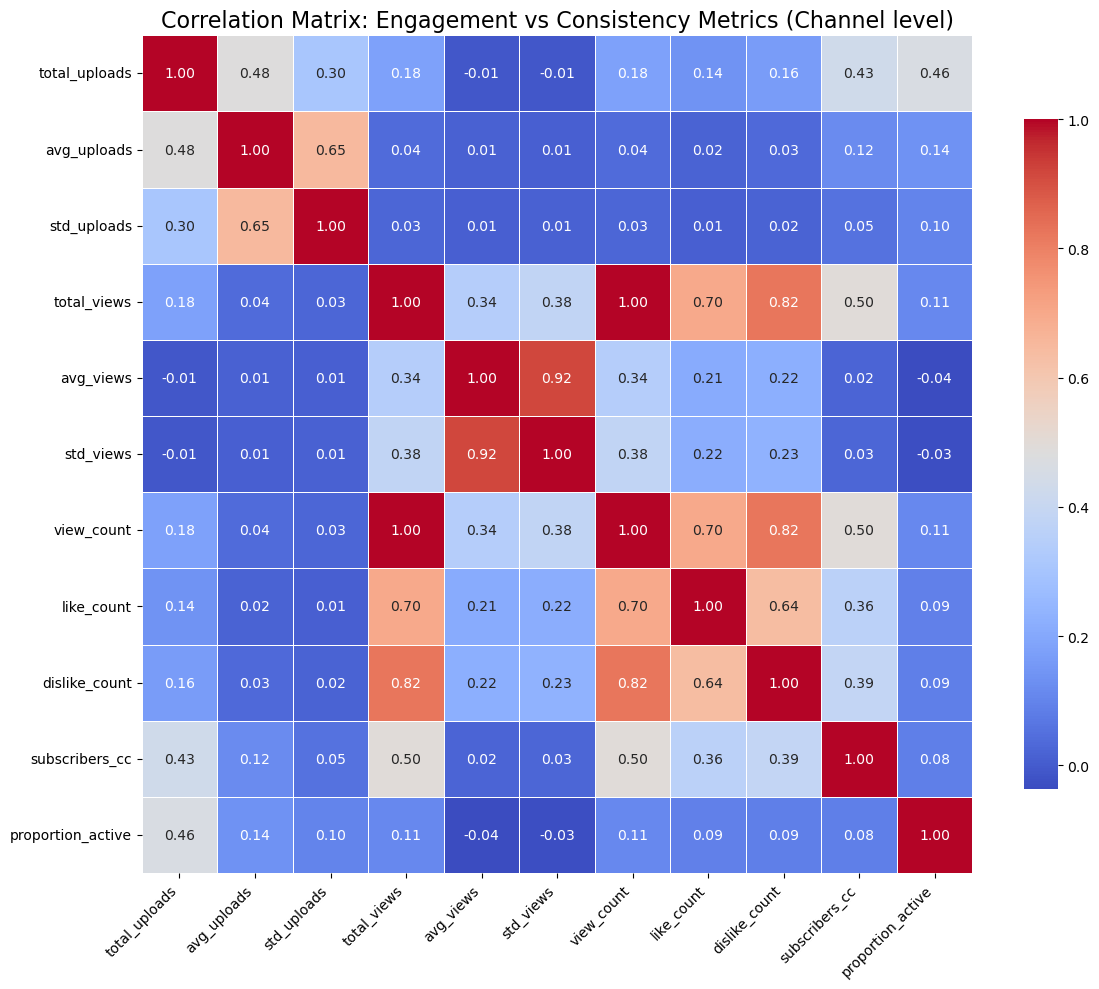

In [49]:
# Aggregate engagement metrics per channel
engagement_metrics = channel_video_data.groupby(['channel_id', 'channel_category']).agg({
    'view_count': 'sum',       # Total views
    'like_count': 'sum',       # Total likes
    'dislike_count': 'sum',    # Total dislikes
    'subscribers_cc': 'sum'    # Total subscribers
}).reset_index()

# Merge engagement metrics with consistency metrics
merged_metrics = pd.merge(
    channel_metrics, 
    engagement_metrics, 
    on=['channel_id', 'channel_category'], 
    how='left'
)

# Select relevant columns for correlation analysis
correlation_data = merged_metrics[[
    'total_uploads', 'avg_uploads', 'std_uploads',    # Upload metrics
    'total_views', 'avg_views', 'std_views',          # View metrics
    'view_count', 'like_count', 'dislike_count',      # Engagement metrics
    'subscribers_cc',                                 # Subscribers
    'proportion_active'                               # Consistency metrics
]]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Matrix: Engagement vs Consistency Metrics (Channel level)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

We can see that the consistency of uploads represented by the proportion of active months isn't correlated with any engagement metrics such as likes, dislikes, views and subscribers at the channels-level. This could indicate that the consistency of uploads isn't relevant to the growth of the channel.

But again, these small correlations might be explained by the diversity of the channels just like for the frequency. That is why we will below consider the consistency metrics in the category level to correlate them with engagement metrics.

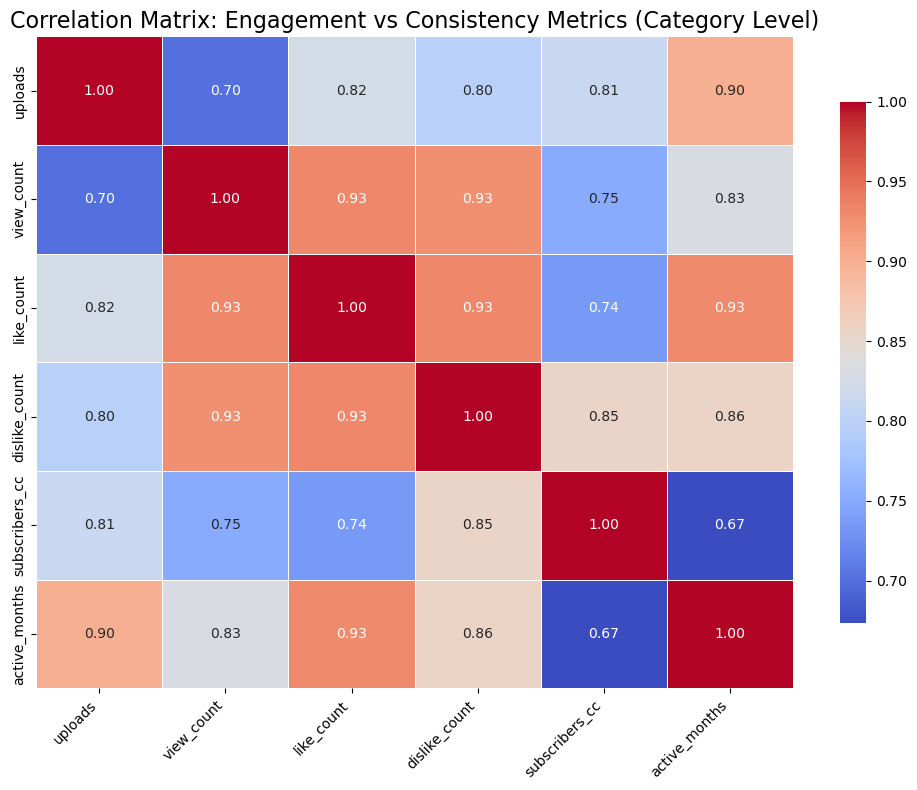

In [50]:
# Aggregate metrics at the category level
category_metrics = channel_video_data.groupby('channel_category').agg({
    'view_count': 'sum',       # Total views
    'like_count': 'sum',       # Total likes
    'dislike_count': 'sum',    # Total dislikes
    'subscribers_cc': 'sum',   # Total subscribers
    'upload_date': 'count'     # Total uploads
}).reset_index()

# Rename the upload_date column to uploads
category_metrics.rename(columns={'upload_date': 'uploads'}, inplace=True)

# Add consistency metrics at the category level
category_consistency = channel_metrics.groupby('channel_category').agg({
    'active_months': 'sum',    # Total active months for the category
}).reset_index()

# Merge category-level engagement and consistency metrics
category_data = pd.merge(
    category_metrics,
    category_consistency,
    on='channel_category',
    how='left'
)

# Select relevant columns for correlation analysis
correlation_data_category = category_data[[
    'uploads',              # Upload metrics
    'view_count', 'like_count', 'dislike_count',  # Engagement metrics
    'subscribers_cc',       # Subscribers
    'active_months'         # Total active months
]]

# Compute the correlation matrix
correlation_matrix_category = correlation_data_category.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix_category, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'shrink': 0.8}
)

plt.title("Correlation Matrix: Engagement vs Consistency Metrics (Category Level)", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()

The active_months metric in this correlation matrix is a representation of upload consistency for each category, as it measures the total number of months where significant activity occurred.

As we can see with respect to categories, the consistency metric represented by the total number of active months in the dataset is highly correlated with the engagement metrics (0.83 for views, 0.93 for likes, 0.86 for dislikes and 0.67 for subscribers) suggesting that categories that have more consistent uploads (active months) also tend to have higher overall engagement (views, likes, dislikes).

Moreover, active months could be a good indicator of professionalization. Categories with high active months likely represent more professionalized or established creators, as consistent uploads are often a hallmark of serious content creators.

## Conclusion

This notebook analyzed the frequency and consistency of YouTube content creation across categories over time, providing insight into the professionalization of creators on the platform. By examining upload patterns and their correlations with key engagement metrics, we identified trends that highlight the role of consistent content creation in YouTube's evolution.

The time-series analysis revealed a clear upward trajectory in upload frequencies across most categories, particularly post-2010. This growth aligns with YouTube's rise as a professional content platform, supporting creators who treat content creation as a career rather than a hobby.

While this analysis focused on content upload frequency and consistency, it opens pathways for complementary research questions explored by other team members:

- Which categories led YouTube's professionalization, and how did professional practices spread?

- How has creator content strategy evolved to reflect professional monetization approaches?

- How does investment in content production reflect the transition from hobby to profession?

- How has community management evolved from casual interaction to professional engagement strategies?

By combining these analyses, we aim to build a comprehensive understanding of YouTube’s transformation into a platform that empowers digital content creators to pursue full-time careers.